## Shared Biking Data from Washington, DC

In this notebook we look at some data visualizations of this dataset found on Kaggle.

https://www.kaggle.com/marklvl/bike-sharing-dataset/home



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl
import json
import csv

**We download and read the dataset into a DataFrame.**

In [2]:
bikeDays = pd.read_csv("biking/hour.csv")

In [3]:
bikeDays.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**It is good to know something about the size of the dataset.**

In [4]:
len(bikeDays)

17379

**And you should always examine the types of your data. Don't rely on Pandas or any other library to always get all the types correct. A type can be inferred incorrectly if you have some dirt in your data (for instance one row might have an incorrect value and that could change the type of the whole column.**

In [5]:
bikeDays.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Box and Whisker Plot

**We'll choose to compute a box and whisker plot to understand something about the distribution of the data for at least the continuous data columns. Discrete values may also be analyzed this way as well. First we put together a list of the for columns we wish to analyze.** 

In [6]:
data = [bikeDays["temp"], bikeDays["atemp"], bikeDays["hum"], bikeDays["windspeed"]]

**Then we plot the four columns. The box represents the middle 50% of the data. The line in the box is the median value. The upper and lower ends of the box are the 1st and 3rd Quartile values. The ends of the whiskers are the 3rd Quartile + (1.5\*IQR) and the 1st Quartile - (1.5\*IQR). The IQR is the 3rd-1st Quartile. The dots are the outliers outside the range of most values. It may be that you want to eliminate those rows that lie outside the normal distribution of values. The values on the x-axis are shown as normalized to the range. Normalized means they are shown as percentages between 0 and 1.**

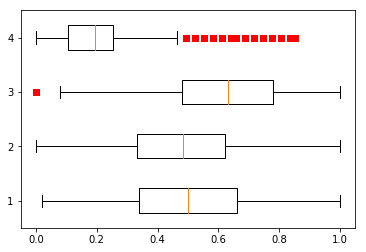

In [7]:
plt.boxplot(data, False, "rs", False)
plt.show()

## Bubble Plot

### Finding Peak Times during Workdays

Let's find the peak times during workdays for bike riders. 

In [8]:
bikeDays.shape

(17379, 17)

In [9]:
workdayAveragesByHour = bikeDays[bikeDays.workingday==1].groupby('hr').mean()["cnt"]
workdayAveragesByHour

hr
0      36.786290
1      16.552632
2       8.683778
3       4.942553
4       5.429787
5      24.913131
6     102.500000
7     290.612903
8     477.006048
9     241.518145
10    135.366935
11    158.229839
12    200.820926
13    198.429719
14    183.572289
15    201.331325
16    293.122244
17    525.290581
18    492.226908
19    348.401606
20    249.718876
21    186.287149
22    138.389558
23     88.708835
Name: cnt, dtype: float64

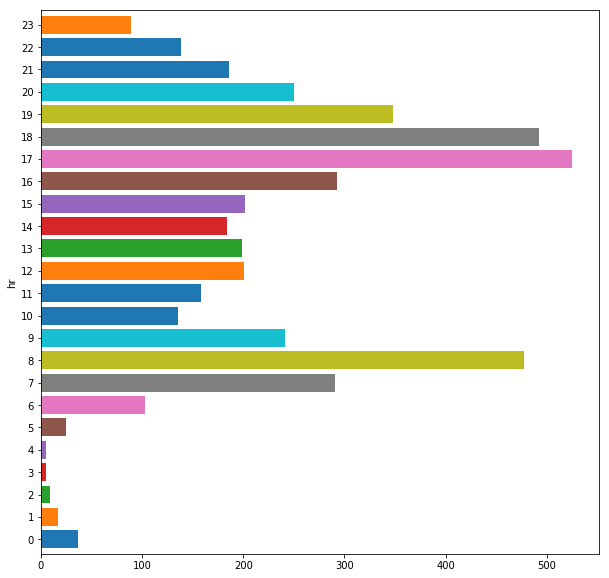

In [10]:
workdayAveragesByHour.plot(kind="barh",width=0.8, figsize=(10,10))


### But what if we want to know by season what happens. If we plot Season in one direction and hour in another we may see a different picture.

We can make what is called a Bubble Plot to see the intensity or density of a data point in two dimensions. This type of plot works well for visualizing three dimensional data. In this particular circumstance, the two axes will be the hour of the day and the season of the year. Since there are only four seasons we will see a relatively discrete set of four columns of data. But we do get to instantly visualize the use of the bikes during hours of the day for all four seasons.  

In [14]:
workDaysBySeasonHour = bikeDays[bikeDays.workingday==1].groupby(['season','hr']).mean()
workDaysBySeasonHour

instant        yr       mnth  holiday   weekday  workingday  \
season hr                                                                     
1      0    6212.957265  0.512821   3.025641      0.0  3.119658         1.0   
       1    6213.957265  0.512821   3.025641      0.0  3.119658         1.0   
       2    6495.828829  0.540541   3.081081      0.0  3.198198         1.0   
       3    6953.030612  0.571429   3.326531      0.0  3.193878         1.0   
       4    7021.312500  0.604167   3.052083      0.0  3.052083         1.0   
       5    6217.564103  0.512821   3.025641      0.0  3.119658         1.0   
       6    6175.881356  0.508475   3.016949      0.0  3.110169         1.0   
       7    6176.881356  0.508475   3.016949      0.0  3.110169         1.0   
       8    6177.881356  0.508475   3.016949      0.0  3.110169         1.0   
       9    6178.881356  0.508475   3.016949      0.0  3.110169         1.0   
       10   6179.881356  0.508475   3.016949      0.0  3.110169         1.0   
       11   6180.881356  0.508475   3.016949      0.0  3.110169         1.0   
       12   6133.268908  0.504202   3.000000      0.0  3.100840         1.0   
       13   6134.268908  0.504202   3.000000      0.0  3.100840         1.0   
       14   6135.268908  0.504202   3.000000      0.0  3.100840         1.0   
       15   6136.268908  0.504202   3.000000      0.0  3.100840         1.0   
       16   6091.025000  0.500000   2.983333      0.0  3.108333         1.0   
       17   6092.025000  0.500000   2.983333      0.0  3.108333         1.0   
       18   6139.285714  0.504202   3.000000      0.0  3.109244         1.0   
       19   6140.285714  0.504202   3.000000      0.0  3.109244         1.0   
       20   6141.285714  0.504202   3.000000      0.0  3.109244         1.0   
       21   6142.285714  0.504202   3.000000      0.0  3.109244         1.0   
       22   6143.285714  0.504202   3.000000      0.0  3.109244         1.0   
       23   6144.285714  0.504202   3.000000      0.0  3.109244         1.0   
2      0    7260.875000  0.500000   4.640625      0.0  3.015625         1.0   
       1    7261.875000  0.500000   4.640625      0.0  3.015625         1.0   
       2    7262.875000  0.500000   4.640625      0.0  3.015625         1.0   
       3    7274.730159  0.500000   4.650794      0.0  3.047619         1.0   
       4    7364.427419  0.508065   4.685484      0.0  3.048387         1.0   
       5    7265.828125  0.500000   4.640625      0.0  3.015625         1.0   
...                 ...       ...        ...      ...       ...         ...   
3      18   9488.893130  0.496183   7.679389      0.0  3.068702         1.0   
       19   9489.893130  0.496183   7.679389      0.0  3.068702         1.0   
       20   9490.893130  0.496183   7.679389      0.0  3.068702         1.0   
       21   9491.893130  0.496183   7.679389      0.0  3.068702         1.0   
       22   9492.893130  0.496183   7.679389      0.0  3.068702         1.0   
       23   9493.893130  0.496183   7.679389      0.0  3.068702         1.0   
4      0   11690.358333  0.500000  10.708333      0.0  3.000000         1.0   
       1   11656.117647  0.495798  10.714286      0.0  3.016807         1.0   
       2   11689.500000  0.500000  10.711864      0.0  3.033898         1.0   
       3   11618.551724  0.491379  10.715517      0.0  3.000000         1.0   
       4   11659.084034  0.495798  10.714286      0.0  3.016807         1.0   
       5   11660.084034  0.495798  10.714286      0.0  3.016807         1.0   
       6   11661.084034  0.495798  10.714286      0.0  3.016807         1.0   
       7   11662.084034  0.495798  10.714286      0.0  3.016807         1.0   
       8   11663.084034  0.495798  10.714286      0.0  3.016807         1.0   
       9   11664.084034  0.495798  10.714286      0.0  3.016807         1.0   
       10  11665.084034  0.495798  10.714286      0.0  3.016807         1.0   
       11  11666.084034  0.495798  10.714286      0.0  3.016807   

In [15]:
workDaysBySeasonHour.reset_index(level=0,inplace=True)
workDaysBySeasonHour.reset_index(level=0,inplace=True)
workDaysBySeasonHour

,hr,season,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,6212.957265,0.512821,3.025641,0.0,3.119658,1.0,1.521368,0.284274,0.287880,0.636923,0.184338,2.504274,16.435897,18.940171
1,1,1,6213.957265,0.512821,3.025641,0.0,3.119658,1.0,1.495726,0.277949,0.281917,0.652821,0.184213,1.222222,7.529915,8.752137
2,2,1,6495.828829,0.540541,3.081081,0.0,3.198198,1.0,1.468468,0.275856,0.280235,0.653964,0.183141,0.963964,3.909910,4.873874
3,3,1,6953.030612,0.571429,3.326531,0.0,3.193878,1.0,1.448980,0.280204,0.285094,0.671633,0.180936,0.367347,2.479592,2.846939
4,4,1,7021.312500,0.604167,3.052083,0.0,3.052083,1.0,1.427083,0.265833,0.271152,0.687604,0.185329,0.270833,2.093750,2.364583
5,5,1,6217.564103,0.512821,3.025641,0.0,3.119658,1.0,1.427350,0.254017,0.260293,0.679060,0.171331,0.307692,13.478632,13.786325
6,6,1,6175.881356,0.508475,3.016949,0.0,3.110169,1.0,1.474576,0.248136,0.256806,0.685000,0.174430,1.389831,57.093220,58.483051
7,7,1,6176.881356,0.508475,3.016949,0.0,3.110169,1.0,1.474576,0.245932,0.255007,0.684492,0.173542,4.830508,161.440678,166.271186
8,8,1,6177.881356,0.508475,3.016949,0.0,3.110169,1.0,1.491525,0.250678,0.256419,0.677203,0.182145,9.745763,322.372881,332.118644
9,9,1,6178.881356,0.508475,3.016949,0.0,3.110169,1.0,1.525424,0.266271,0.267973,0.647797,0.205169,10.254237,173.805085,184.059322


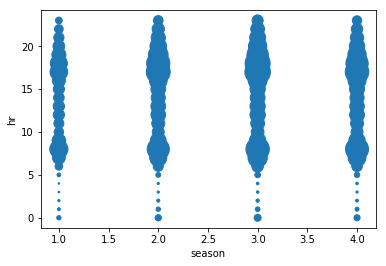

In [16]:
workDaysBySeasonHour.plot.scatter(x='season', y='hr', s=workDaysBySeasonHour['cnt']);

### Try this by month and hour to see the usage during the whole year.

In [17]:
workDaysByMonthHour = bikeDays[bikeDays.workingday==1].groupby(['mnth','hr']).mean()
workDaysByMonthHour.reset_index(level=0,inplace=True)
workDaysByMonthHour.reset_index(level=0,inplace=True)
workDaysByMonthHour

,hr,mnth,instant,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,4903.657895,1.000000,0.526316,0.0,3.026316,1.0,1.552632,0.225263,0.231666,0.655263,0.193639,1.631579,13.447368,15.078947
1,1,1,4904.657895,1.000000,0.526316,0.0,3.026316,1.0,1.473684,0.220526,0.227271,0.665000,0.183821,0.894737,5.842105,6.736842
2,2,1,5162.138889,1.000000,0.555556,0.0,3.138889,1.0,1.500000,0.222778,0.227692,0.666667,0.190294,0.583333,3.694444,4.277778
3,3,1,6386.192308,1.000000,0.692308,0.0,3.192308,1.0,1.384615,0.226154,0.234850,0.645385,0.185996,0.384615,2.538462,2.923077
4,4,1,5590.909091,1.000000,0.606061,0.0,2.939394,1.0,1.484848,0.213333,0.222688,0.660606,0.181370,0.121212,2.272727,2.393939
5,5,1,4908.157895,1.000000,0.526316,0.0,3.026316,1.0,1.526316,0.207895,0.215316,0.655263,0.194432,0.026316,13.526316,13.552632
6,6,1,4909.157895,1.000000,0.526316,0.0,3.026316,1.0,1.526316,0.198947,0.208537,0.679737,0.181858,0.789474,53.184211,53.973684
7,7,1,4910.157895,1.000000,0.526316,0.0,3.026316,1.0,1.500000,0.197895,0.211326,0.672632,0.168111,3.473684,142.184211,145.657895
8,8,1,4911.157895,1.000000,0.526316,0.0,3.026316,1.0,1.500000,0.202105,0.212124,0.652632,0.184216,7.368421,298.500000,305.868421
9,9,1,4912.157895,1.000000,0.526316,0.0,3.026316,1.0,1.578947,0.210000,0.216111,0.632632,0.194434,7.605263,155.605263,163.210526


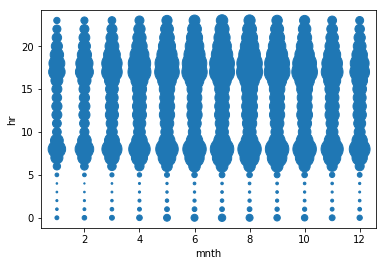

In [18]:
workDaysByMonthHour.plot.scatter(x='mnth', y='hr', s=workDaysByMonthHour['cnt']);

## Violin Plot

A violin plot is a Box and whisker plot that include information about the population density. The width of the violin relates to the density of the data at that value. This gives us insight not only into the quartiles, but also the distribution of the data within those quartiles. 

This graph shows us that there is a pretty even distribution of data in the interquartile range. The temperatures are normalized in the data set so it is impossible (without knowing the max and min used to normalize) what the exact temperature was. 

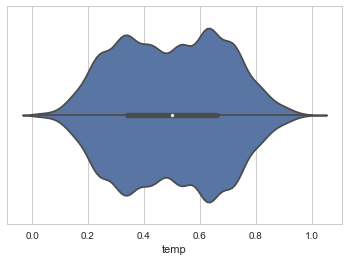

In [20]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.violinplot(x=bikeDays["temp"])

## Heat Map

Another way to visualize 3D data is with a heat map. A heat map will let you see where two categorical columns have the greatest third dimension. The two columns must be categorical as in the data for biking by hour and month of year.

In this graph we can quickly see that the peak usage time of year is in August between 4pm and 6pm.

In [21]:
import seaborn as sns

**We must create a pivot table to construct the heat map matrix of data.**

In the Stacked Graph notebook we used the method *pivot_table*. Here we use the *pivot* method. The difference is that *pivot_table* is more powerful and able to handle duplicate values in an entry through an aggregation function. The default aggregation function is the *mean*. Here is some documentation on the differences between the two.

https://stackoverflow.com/questions/30960338/pandas-difference-between-pivot-and-pivot-table-why-is-only-pivot-table-workin

In [24]:
heatMapData = workDaysByMonthHour[["mnth","hr","cnt"]].pivot("hr","mnth","cnt")
heatMapData

mnth,1,2,3,4,5,6,7,8,9,10,11,12
hr,,,,,,,,,,,,
0,15.078947,20.789474,23.711111,31.900000,47.558140,48.930233,54.243902,49.326087,41.525000,41.560976,34.425000,28.195122
1,6.736842,8.289474,12.777778,14.925000,22.837209,22.139535,22.121951,22.326087,18.384615,17.500000,14.550000,13.829268
2,4.277778,4.472222,6.348837,8.950000,11.674419,10.162791,12.243902,10.934783,10.256410,7.825000,8.692308,7.000000
3,2.923077,2.606061,3.418605,4.631579,5.837209,5.511628,6.902439,5.586957,6.974359,5.410256,4.473684,3.829268
4,2.393939,1.714286,2.921053,4.128205,5.348837,7.255814,6.439024,7.239130,7.175000,6.725000,6.575000,5.000000
5,13.552632,13.368421,16.977778,18.925000,24.558140,30.093023,33.317073,30.913043,34.050000,31.475000,27.575000,22.585366
6,53.973684,58.794872,72.822222,84.450000,111.093023,131.860465,136.390244,129.586957,137.425000,122.675000,102.325000,81.560976
7,145.657895,178.435897,208.466667,258.200000,309.023256,373.418605,373.731707,366.282609,382.875000,342.075000,295.350000,234.439024
8,305.868421,346.487179,403.488889,461.500000,506.953488,548.790698,552.536585,548.391304,551.425000,552.075000,492.425000,432.390244


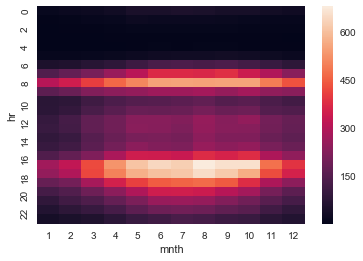

In [25]:
ax = sns.heatmap(heatMapData)